In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install paddleocr

  Using cached albumentations-1.4.10-py3-none-any.whl.metadata (38 kB)
Using cached albumentations-1.4.10-py3-none-any.whl (161 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.2
    Uninstalling albumentations-1.4.2:
      Successfully uninstalled albumentations-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
vietocr 0.3.13 requires albumentations==1.4.2, but you have albumentations 1.4.10 which is incompatible.


In [ ]:
!pip install paddlepaddle-gpu -f https://www.paddlepaddle.org.cn/whl/linux/mkl/gpu.html


Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/gpu.html


In [ ]:
# !pip install paddleocr


In [ ]:
import paddle
print(paddle.version.cuda())  # Kiểm tra phiên bản CUDA
print(paddle.is_compiled_with_cuda())  # Kiểm tra xem PaddlePaddle có hỗ trợ CUDA không


11.8
True


In [ ]:
!pip install vietocr

  Using cached albumentations-1.4.2-py3-none-any.whl.metadata (36 kB)
Using cached albumentations-1.4.2-py3-none-any.whl (133 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.10
    Uninstalling albumentations-1.4.10:
      Successfully uninstalled albumentations-1.4.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
paddleocr 2.9.1 requires albumentations==1.4.10, but you have albumentations 1.4.2 which is incompatible.


[2024/10/23 03:18:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, 

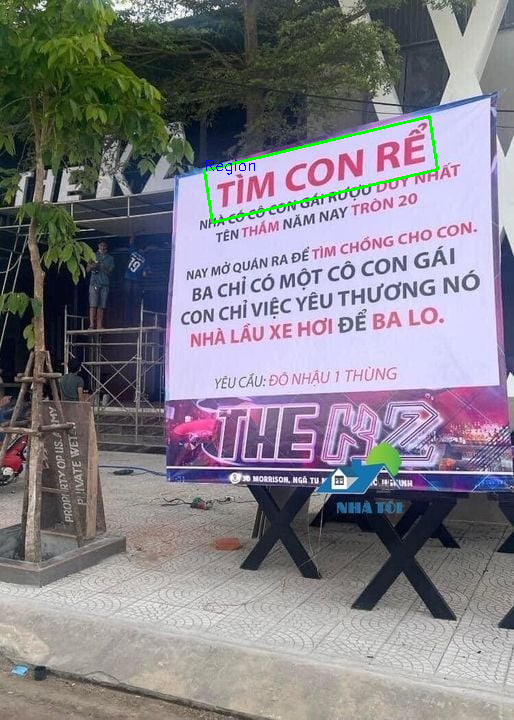

In [ ]:
import cv2
import numpy as np
from paddleocr import PaddleOCR
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from PIL import Image  # Import the Image module from PIL
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab

# Khởi tạo PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='vi', use_gpu = True)

# Khởi tạo config cho VietOCR
config = Cfg.load_config_from_name('vgg_transformer')


# Khởi tạo VietOCR với config
predictor = Predictor(config)

path = '9ef522967985161dcd81e821b3820fb8ab88a11ad2f7fb0cc7ef858eee50e980'
# Đường dẫn tới ảnh
image_path = f'/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/{path}.jpg'

# Đọc hình ảnh để lấy kích thước
image = cv2.imread(image_path)
img_height, img_width, _ = image.shape  # Lấy chiều cao và chiều rộng của ảnh

# Thực hiện nhận diện văn bản và lấy các kết quả
results = ocr.ocr(image_path, cls=True)
print(results)

# Kiểm tra nếu kết quả có chữ
if results and results[0] is not None:
    # Lấy ra bounding box từ kết quả
    bounding_boxes = []
    a = 7
    b = 9
    for line in results:
        for word_info in line:
            box = word_info[0]  # bounding box
            print(box)
            # Điều chỉnh bounding box và kiểm tra giới hạn ảnh
            box[0][0] = max(0, box[0][0 ] - a)  # Tọa độ (x_min, y_min)
            box[0][1] = max(0, box[0][1] - b)

            box[1][0] = min(img_width-2, box[1][0] + a)  # Tọa độ (x_max, y_min)
            box[1][1] = max(2, box[1][1] - b)

            box[2][0] = min(img_width-2, box[2][0] + a)  # Tọa độ (x_max, y_max)
            box[2][1] = min(img_height-2, box[2][1] + b)

            box[3][0] = max(2, box[3][0] - a)  # Tọa độ (x_min, y_max)
            box[3][1] = min(img_height-2, box[3][1] + b)
            print(box)
            bounding_boxes.append(box)

else:
    print("No text detected in the image.")
print(len(bounding_boxes))
print(bounding_boxes)
box = [[204.0, 170.0], [429.0, 116.0], [437.0, 169.0], [212.0, 222.0]]
# Lấy tọa độ của bounding box
x_min, y_min = int(box[0][0]), int(box[0][1])
x_max, y_max = int(box[2][0]), int(box[2][1])

# Vẽ bounding box lên hình ảnh
cv2.polylines(image, [np.array(box).astype(np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

# In văn bản đã nhận diện ở vị trí gần bounding box (trên cùng bên trái)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5  # Điều chỉnh kích thước chữ
font_color = (255, 0, 0)  # Màu xanh dương (RGB)
thickness = 1  # Độ dày của chữ
position = (x_min, y_min )  # Vị trí ở phía trên bên trái của bounding box

# Ghi text lên hình ảnh
cv2.putText(image, f"Region", position, font, font_scale, font_color, thickness)
cv2_imshow(image)
box = [[183.0, 264.0], [593.0, 183.0], [605.0, 255.0], [194.0, 336.0]]
roi = image[int(box[0][1]):int(box[2][1]), int(box[0][0]):int(box[2][0])]


In [ ]:
def is_close_enough(box1, box2, threshold_y=20):

    y1_max = int(box1[2][1])  # Cạnh dưới của box1
    y2_min = int(box2[0][1])  # Cạnh trên của box2

    x1_min = int(box1[0][0])  # Cạnh trái của box1
    x2_min = int(box2[0][0])  # Cạnh trái của box2

    x1_max = int(box1[2][0])  # Cạnh phải của box1
    x2_max = int(box2[2][0])  # Cạnh phải của box2

    if x2_min - x1_max > 5 or x1_min - x2_max > 5:
        return False

    return y2_min - y1_max <= threshold_y or y2_min <= y1_max


In [ ]:
def merge_boxes_and_text(box1, box2, text1, text2):
    # Gộp text
    merged_text = text1 + " " + text2

    # Lấy tọa độ nhỏ nhất và lớn nhất của hai bounding box
    x_min = min(int(box1[0][0]), int(box2[0][0]))
    y_min = int(box1[0][1])
    x_max = max(int(box1[2][0]), int(box2[2][0]))
    y_max = int(box2[2][1])

    # Tạo bounding box gộp
    merged_box = [[x_min, y_min], [x_max, y_min], [x_max, y_max], [x_min, y_max]]

    return merged_box, merged_text


[[204.0, 170.0], [429.0, 116.0], [437.0, 169.0], [212.0, 222.0]]
116 222 204 437
[[188.0, 206.0], [465.0, 151.0], [469.0, 187.0], [191.0, 241.0]]
151 241 188 469
[[205.0, 219.0], [425.0, 179.0], [428.0, 215.0], [208.0, 254.0]]
179 254 205 428
[[178.0, 256.0], [481.0, 208.0], [484.0, 243.0], [180.0, 291.0]]
208 291 178 484
[[181.0, 275.0], [462.0, 234.0], [465.0, 273.0], [184.0, 314.0]]
234 314 181 465
[[173.0, 299.0], [484.0, 260.0], [487.0, 300.0], [175.0, 338.0]]
260 338 173 487
[[207.0, 365.0], [405.0, 355.0], [406.0, 390.0], [207.0, 400.0]]
355 400 207 406
region 0: TIMCON RE
region 1: TIM CÒNG THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ NHIÊNH
region 2: 0360000000035
region 3: 03610000000000055
region 4: 0311970013700000015
region 5: CÒN CHỈ CÓ MỘT CÓ LƯƠNG NÓ CON CHỈ VIỆC HỒI ĐỂ BA LO.
region 6: YÊU CẦU: ĐÔ NHẬU 1 THÙNG ETHENZ Commonically INHATS


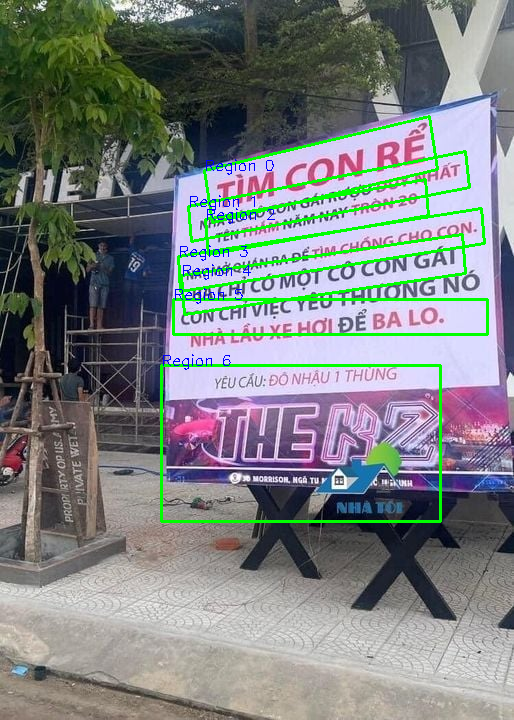

[{'box': [[204.0, 170.0], [429.0, 116.0], [437.0, 169.0], [212.0, 222.0]], 'text': 'TIMCON RE'}, {'box': [[188.0, 206.0], [465.0, 151.0], [469.0, 187.0], [191.0, 241.0]], 'text': 'TIM CÒNG THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ THỊ NHIÊNH'}, {'box': [[205.0, 219.0], [425.0, 179.0], [428.0, 215.0], [208.0, 254.0]], 'text': '0360000000035'}, {'box': [[178.0, 256.0], [481.0, 208.0], [484.0, 243.0], [180.0, 291.0]], 'text': '03610000000000055'}, {'box': [[181.0, 275.0], [462.0, 234.0], [465.0, 273.0], [184.0, 314.0]], 'text': '0311970013700000015'}, {'box': [[173, 299], [487, 299], [487, 334], [173, 334]], 'text': 'CÒN CHỈ CÓ MỘT CÓ LƯƠNG NÓ CON CHỈ VIỆC HỒI ĐỂ BA LO.'}, {'box': [[161, 365], [440, 365], [440, 521], [161, 521]], 'text': 'YÊU CẦU: ĐÔ NHẬU 1 THÙNG ETHENZ Commonically INHATS'}]


In [ ]:
# Đọc hình ảnh để hiển thị
image = cv2.imread(image_path)

bbox_tmp = bounding_boxes.copy()

bbox_res = []

# Duyệt qua từng bounding box và kiểm tra khoảng cách
for i, box1 in enumerate(bbox_tmp):
    if bbox_tmp[i] is None:
      continue
    recognized_text = ''

    # Cắt vùng văn bản từ hình ảnh
    # Tính toán tọa độ nhỏ nhất và lớn nhất từ các điểm trong bounding box
    x1_min = int(min([point[0] for point in box1]))  # Tọa độ X nhỏ nhất
    x1_max = int(max([point[0] for point in box1]))  # Tọa độ X lớn nhất
    y1_min = int(min([point[1] for point in box1]))  # Tọa độ Y nhỏ nhất
    y1_max = int(max([point[1] for point in box1]))  # Tọa độ Y lớn nhất
    text_region = image[y1_min:y1_max, x1_min:x1_max]

    print(box1)
    print(y1_min, y1_max, x1_min, x1_max)
    # Open the image using Pillow's Image module
    image_for_vietocr = Image.fromarray(cv2.cvtColor(text_region, cv2.COLOR_BGR2RGB))

    # Nhận diện văn bản từ vùng cắt
    recognized_text = predictor.predict(image_for_vietocr)

    j = i + 1
    # Kiểm tra box tiếp theo để xem có khoảng cách đủ nhỏ không
    for j in range(j, len(bbox_tmp)) :
      box2 = bbox_tmp[j]
      if bbox_tmp[j] is None:
        continue
      if is_close_enough(box1, box2):
          # Nếu khoảng cách nhỏ, ghép đoạn văn bản và mở rộng bounding box
          # Tính toán tọa độ nhỏ nhất và lớn nhất từ các điểm trong bounding box
          x2_min = int(min([point[0] for point in box2]))  # Tọa độ X nhỏ nhất
          x2_max = int(max([point[0] for point in box2]))  # Tọa độ X lớn nhất
          y2_min = int(min([point[1] for point in box2]))  # Tọa độ Y nhỏ nhất
          y2_max = int(max([point[1] for point in box2]))  # Tọa độ Y lớn nhất
          recognized_text_2 = predictor.predict(Image.fromarray(cv2.cvtColor(image[y2_min:y2_max, x2_min:x2_max], cv2.COLOR_BGR2RGB)))
          box1, recognized_text = merge_boxes_and_text(box1, box2, recognized_text, recognized_text_2)

          # Xóa box2 khỏi danh sách vì đã ghép vào box1
          bbox_tmp[j] = None
    results = {
        'box': box1,
        'text': recognized_text
    }

    bbox_res.append(results)

# Duyệt qua từng bounding box trong bbox_res để vẽ và in văn bản
for i, item in enumerate(bbox_res):
    box = item['box']
    text = item['text']
    if box is None:  # Bỏ qua những bounding box đã bị gộp và xóa
        continue
    print(f'region {i}: {text}')
    # Lấy tọa độ của bounding box
    x_min, y_min = int(box[0][0]), int(box[0][1])
    x_max, y_max = int(box[2][0]), int(box[2][1])

    # Vẽ bounding box lên hình ảnh
    cv2.polylines(image, [np.array(box).astype(np.int32)], isClosed=True, color=(0, 255, 0), thickness=2)

    # In văn bản đã nhận diện ở vị trí gần bounding box (trên cùng bên trái)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5  # Điều chỉnh kích thước chữ
    font_color = (255, 0, 0)  # Màu xanh dương (RGB)
    thickness = 1  # Độ dày của chữ
    position = (x_min, y_min )  # Vị trí ở phía trên bên trái của bounding box

    # Ghi text lên hình ảnh
    cv2.putText(image, f"Region {i}", position, font, font_scale, font_color, thickness)

# Hiển thị hình ảnh với các bounding box và text
cv2_imshow(image)
print(bbox_res)

In [ ]:
def OCR(image_path):
  # Đọc hình ảnh để lấy kích thước
  image = cv2.imread(image_path)
  img_height, img_width, _ = image.shape  # Lấy chiều cao và chiều rộng của ảnh

  # Thực hiện nhận diện văn bản và lấy các kết quả
  results = ocr.ocr(image_path, cls=True)


  bounding_boxes = []
  # Kiểm tra nếu kết quả có chữ
  if results and results[0] is not None:
      a = 7
      b = 9
      for line in results:
          for word_info in line:
              box = word_info[0]  # bounding box
              # Điều chỉnh bounding box và kiểm tra giới hạn ảnh
              box[0][0] = max(0, box[0][0] - a)  # Tọa độ (x_min, y_min)
              box[0][1] = max(0, box[0][1] - b)

              box[1][0] = min(img_width, box[1][0] + a)  # Tọa độ (x_max, y_min)
              box[1][1] = max(0, box[1][1] - b)

              box[2][0] = min(img_width, box[2][0] + a)  # Tọa độ (x_max, y_max)
              box[2][1] = min(img_height, box[2][1] + b)

              box[3][0] = max(0, box[3][0] - a)  # Tọa độ (x_min, y_max)
              box[3][1] = min(img_height, box[3][1] + b)
              bounding_boxes.append(box)

  bbox_tmp = bounding_boxes.copy()

  bbox_res = []
  combined_text = ''
  # Duyệt qua từng bounding box và kiểm tra khoảng cách
  for i, box1 in enumerate(bbox_tmp):
      if bbox_tmp[i] is None:
        continue
      recognized_text = ''

      # Cắt vùng văn bản từ hình ảnh
      # Tính toán tọa độ nhỏ nhất và lớn nhất từ các điểm trong bounding box
      x1_min = int(min([point[0] for point in box1]))  # Tọa độ X nhỏ nhất
      x1_max = int(max([point[0] for point in box1]))  # Tọa độ X lớn nhất
      y1_min = int(min([point[1] for point in box1]))  # Tọa độ Y nhỏ nhất
      y1_max = int(max([point[1] for point in box1]))  # Tọa độ Y lớn nhất
      text_region = image[y1_min:y1_max, x1_min:x1_max]

      # Open the image using Pillow's Image module
      image_for_vietocr = Image.fromarray(cv2.cvtColor(text_region, cv2.COLOR_BGR2RGB))

      # Nhận diện văn bản từ vùng cắt
      recognized_text = predictor.predict(image_for_vietocr)

      j = i + 1
      # Kiểm tra box tiếp theo để xem có khoảng cách đủ nhỏ không
      for j in range(j, len(bbox_tmp)) :
        box2 = bbox_tmp[j]
        if bbox_tmp[j] is None:
          continue
        if is_close_enough(box1, box2):
            # Nếu khoảng cách nhỏ, ghép đoạn văn bản và mở rộng bounding box
            # Nếu khoảng cách nhỏ, ghép đoạn văn bản và mở rộng bounding box
            # Tính toán tọa độ nhỏ nhất và lớn nhất từ các điểm trong bounding box
            x2_min = int(min([point[0] for point in box2]))  # Tọa độ X nhỏ nhất
            x2_max = int(max([point[0] for point in box2]))  # Tọa độ X lớn nhất
            y2_min = int(min([point[1] for point in box2]))  # Tọa độ Y nhỏ nhất
            y2_max = int(max([point[1] for point in box2]))  # Tọa độ Y lớn nhất
            recognized_text_2 = predictor.predict(Image.fromarray(cv2.cvtColor(image[y2_min:y2_max, x2_min:x2_max], cv2.COLOR_BGR2RGB)))
            box1, recognized_text = merge_boxes_and_text(box1, box2, recognized_text, recognized_text_2)

            # Xóa box2 khỏi danh sách vì đã ghép vào box1
            bbox_tmp[j] = None
      results = {
          'box': box1,
          'text': recognized_text
      }

      combined_text += recognized_text + ' '
  return combined_text



In [ ]:
import json
import cv2
import numpy as np
from paddleocr import PaddleOCR
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from PIL import Image  # Import the Image module from PIL
# Đường dẫn đến tệp JSON
json_file_path = '/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/vimmsd-train.json'

output_json_path = '/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/vimmsd_train_updated_ocr.json'
# Đọc tệp JSON
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Duyệt qua từng đối tượng trong JSON
for key, item in data.items():
    print(key)
    image = item['image']
    # if image == '4f4dbf71439ec50b5a55d9f729c6f9a12758757e2e2d4e11865f0353501f5e2f.jpg':
    #   continue
    image_path = f'/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/{image}'  # Đường dẫn tới ảnh
    print(image_path)

    text_image = OCR(image_path)
    # Thêm trường mới vào đối tượng
    item['text_image'] = text_image.strip()  # Cắt khoảng trắng thừa

    # Ghi lại tệp JSON với trường mới
    with open(output_json_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)


0
/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/8ae451edcd8ebf697f8763ece249115813149c55733bf8306b971210d48b15d3.jpg
[2024/10/23 03:21:56] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.013237714767456055
[2024/10/23 03:21:56] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/10/23 03:21:56] ppocr DEBUG: rec_res num  : 0, elapsed : 3.0994415283203125e-06
1
/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/35370ffd6c791d6f8c4ab3dd4363ed468fab41e4824ee9984169f58be672a0b7.jpg
[2024/10/23 03:21:56] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.028410911560058594
[2024/10/23 03:21:56] ppocr DEBUG: cls num  : 15, elapsed : 0.021092891693115234
[2024/10/23 03:21:56] ppocr DEBUG: rec_res num  : 15, elapsed : 0.0484776496887207
2
/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/316fdd1477725b9fb1a55015ac06b68b92b50bd4303e08590dadedace629ae61.jpg
[2024/10/23 03:21:58] ppocr DEBUG: dt_boxes num : 1,

KeyboardInterrupt: 

In [ ]:
import paddle

# Kiểm tra xem có GPU sẵn có không
if paddle.is_compiled_with_cuda():
    print("PaddlePaddle is compiled with CUDA. Checking GPU availability...")

    # Kiểm tra số lượng GPU có sẵn
    gpu_count = paddle.device.cuda.device_count()
    if gpu_count > 0:
        print(f"Number of GPUs available: {gpu_count}")
        for i in range(gpu_count):
            gpu_properties = paddle.device.cuda.get_device_properties(i)
            print(f"GPU {i}: {gpu_properties.name}")
    else:
        print("No GPUs available.")
else:
    print("PaddlePaddle is not compiled with CUDA. Using CPU.")


PaddlePaddle is compiled with CUDA. Checking GPU availability...
Number of GPUs available: 1
GPU 0: Tesla T4


In [ ]:
# Khởi tạo PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='vi', use_gpu = True)

[2024/10/23 03:26:15] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, 

In [ ]:
import cv2
import numpy as np
from paddleocr import PaddleOCR
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from PIL import Image  # Import the Image module from PIL

# Khởi tạo PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang='vi', use_gpu = True)

# Khởi tạo config cho VietOCR
config = Cfg.load_config_from_name('vgg_transformer')

# Khởi tạo VietOCR với config
predictor = Predictor(config)

def OCR(image_path):
  # Đọc hình ảnh để lấy kích thước
  image = cv2.imread(image_path)
  img_height, img_width, _ = image.shape  # Lấy chiều cao và chiều rộng của ảnh

  # Thực hiện nhận diện văn bản và lấy các kết quả
  results = ocr.ocr(image_path, cls=True)


  bounding_boxes = []
  # Kiểm tra nếu kết quả có chữ
  if results and results[0] is not None:
      a = 7
      b = 9
      for line in results:
          for word_info in line:
              box = word_info[0]  # bounding box
              # Điều chỉnh bounding box và kiểm tra giới hạn ảnh
              box[0][0] = max(0, box[0][0] - a)  # Tọa độ (x_min, y_min)
              box[0][1] = max(0, box[0][1] - b)

              box[1][0] = min(img_width, box[1][0] + a)  # Tọa độ (x_max, y_min)
              box[1][1] = max(0, box[1][1] - b)

              box[2][0] = min(img_width, box[2][0] + a)  # Tọa độ (x_max, y_max)
              box[2][1] = min(img_height, box[2][1] + b)

              box[3][0] = max(0, box[3][0] - a)  # Tọa độ (x_min, y_max)
              box[3][1] = min(img_height, box[3][1] + b)
              bounding_boxes.append(box)

  bbox_tmp = bounding_boxes.copy()

  bbox_res = []
  combined_text = ''
  # Duyệt qua từng bounding box và kiểm tra khoảng cách
  for i, box1 in enumerate(bbox_tmp):
      if bbox_tmp[i] is None:
        continue
      recognized_text = ''

      # Cắt vùng văn bản từ hình ảnh
      # Tính toán tọa độ nhỏ nhất và lớn nhất từ các điểm trong bounding box
      x1_min = int(min([point[0] for point in box1]))  # Tọa độ X nhỏ nhất
      x1_max = int(max([point[0] for point in box1]))  # Tọa độ X lớn nhất
      y1_min = int(min([point[1] for point in box1]))  # Tọa độ Y nhỏ nhất
      y1_max = int(max([point[1] for point in box1]))  # Tọa độ Y lớn nhất
      text_region = image[y1_min:y1_max, x1_min:x1_max]

      # Open the image using Pillow's Image module
      image_for_vietocr = Image.fromarray(cv2.cvtColor(text_region, cv2.COLOR_BGR2RGB))

      # Nhận diện văn bản từ vùng cắt
      recognized_text = predictor.predict(image_for_vietocr)

      j = i + 1
      # Kiểm tra box tiếp theo để xem có khoảng cách đủ nhỏ không
      for j in range(j, len(bbox_tmp)) :
        box2 = bbox_tmp[j]
        if bbox_tmp[j] is None:
          continue
        if is_close_enough(box1, box2):
            # Nếu khoảng cách nhỏ, ghép đoạn văn bản và mở rộng bounding box
            # Nếu khoảng cách nhỏ, ghép đoạn văn bản và mở rộng bounding box
            # Tính toán tọa độ nhỏ nhất và lớn nhất từ các điểm trong bounding box
            x2_min = int(min([point[0] for point in box2]))  # Tọa độ X nhỏ nhất
            x2_max = int(max([point[0] for point in box2]))  # Tọa độ X lớn nhất
            y2_min = int(min([point[1] for point in box2]))  # Tọa độ Y nhỏ nhất
            y2_max = int(max([point[1] for point in box2]))  # Tọa độ Y lớn nhất
            recognized_text_2 = predictor.predict(Image.fromarray(cv2.cvtColor(image[y2_min:y2_max, x2_min:x2_max], cv2.COLOR_BGR2RGB)))
            box1, recognized_text = merge_boxes_and_text(box1, box2, recognized_text, recognized_text_2)

            # Xóa box2 khỏi danh sách vì đã ghép vào box1
            bbox_tmp[j] = None
      results = {
          'box': box1,
          'text': recognized_text
      }

      combined_text += recognized_text + ' '
  return combined_text

[2024/10/23 07:56:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, 

In [ ]:
import json

# Đường dẫn đến tệp JSON
json_file_path = '/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/vimmsd-train.json'
output_json_path = '/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/vimmsd_train_updated_ocr.json'

# Đọc tệp JSON
with open(json_file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Tạo tệp output mới (hoặc mở lại tệp đã có nếu chạy tiếp)
try:
    with open(output_json_path, 'r', encoding='utf-8') as outfile:
        updated_data = json.load(outfile)
except FileNotFoundError:
    updated_data = {}  # Nếu tệp chưa tồn tại, khởi tạo một dict trống

# Duyệt qua từng đối tượng trong JSON
for key, item in data.items():
    # Nếu key đã có trong tệp kết quả thì bỏ qua
    if key in updated_data:
        continue

    print(key)
    image = item['image']
    image_path = f'/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/{image}'  # Đường dẫn tới ảnh
    print(image_path)

    # Nhận diện văn bản từ ảnh
    text_image = OCR(image_path)

    # Thêm trường mới vào đối tượng
    item['text_image'] = text_image.strip()  # Cắt khoảng trắng thừa

    # Lưu đối tượng đã cập nhật vào dict mới
    updated_data[key] = item

    # Sau mỗi vòng lặp, lưu kết quả vào tệp JSON
    with open(output_json_path, 'w', encoding='utf-8') as outfile:
        json.dump(updated_data, outfile, ensure_ascii=False, indent=4)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
996
/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/b84f7489a1d50671a5320c8c00a32cf8c06462f602f873c09ae1819c25632599.jpg
[2024/10/23 08:24:54] ppocr DEBUG: dt_boxes num : 0, elapsed : 0.033341407775878906
[2024/10/23 08:24:54] ppocr DEBUG: cls num  : 0, elapsed : 0
[2024/10/23 08:24:54] ppocr DEBUG: rec_res num  : 0, elapsed : 1.6689300537109375e-06
997
/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/512252090532ee616a29568b455e4140c35a223a7a3349d1c3b62f4048c8c727.jpg
[2024/10/23 08:24:55] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.022565603256225586
[2024/10/23 08:24:55] ppocr DEBUG: cls num  : 11, elapsed : 0.017479419708251953
[2024/10/23 08:24:55] ppocr DEBUG: rec_res num  : 11, elapsed : 0.06177520751953125
998
/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/f36bb82adbe816e738d342f5413fe563cbbca1e1837f843f67b04fa01

In [ ]:
from google.colab.patches import cv2_imshow  # Import cv2_imshow for displaying images in Colab
path = 'fff8141568b07e39fef9800cd52cdee45961c8139194cf884f09437f19f6e501'
# Đường dẫn tới ảnh
image_path = f'/content/drive/MyDrive/UIT_Data_Science_Code/Data_train/training-images/train-images/{path}.jpg'
text_image = OCR(image_path)
print(text_image)
# cv2_imshow(cv2.imread(image_path))

[2024/10/23 07:50:54] ppocr DEBUG: dt_boxes num : 6, elapsed : 0.035185813903808594
[2024/10/23 07:50:54] ppocr DEBUG: cls num  : 6, elapsed : 0.009677648544311523
[2024/10/23 07:50:54] ppocr DEBUG: rec_res num  : 6, elapsed : 0.02150130271911621
NGHỆ SĨ GENZ BÂY GIỜ, TOÀN NHẠC RAP, HIP HOP. XẬP XÌNH TIKTOK LINH NHI DEBUT CA KHÚC BALLAD ?MẤT NGỦ? ĐƯỢC KHEN ĐEM LẠI LÀN GIÓ MỚI 


In [ ]:
import torch
print(torch.cuda.is_available())  # True nếu GPU khả dụng
print(torch.cuda.get_device_name(0))  # In ra tên của GPU đang sử dụng


True
Tesla T4


In [ ]:
import paddle
print(paddle.device.is_compiled_with_cuda())  # True nếu Paddle được biên dịch với hỗ trợ CUDA


True
